In [1]:
import pandas as pd

data = pd.read_csv('result1201.csv')
data.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263,62,0.01,71.279624,1154,19.1,83,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271,64,0.01,73.523582,492,18.6,86,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268,66,0.01,73.219243,430,18.1,89,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272,69,0.01,78.184215,2787,17.6,93,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275,71,0.01,7.097109,3013,17.2,97,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2655 entries, 0 to 2654
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2655 non-null   int64  
 1   Status                           2655 non-null   object 
 2   Life expectancy                  2655 non-null   float64
 3   Adult Mortality                  2655 non-null   int64  
 4   infant deaths                    2655 non-null   int64  
 5   Alcohol                          2655 non-null   float64
 6   percentage expenditure           2655 non-null   float64
 7   Measles                          2655 non-null   int64  
 8   BMI                              2655 non-null   float64
 9   under-five deaths                2655 non-null   int64  
 10  Polio                            2655 non-null   int64  
 11  Total expenditure                2655 non-null   float64
 12  Diphtheria          

In [3]:
data.Status = data.Status.replace('Developing', 0)
data.Status = data.Status.replace('Developed', 1)
data.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,0,65.0,263,62,0.01,71.279624,1154,19.1,83,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,59.9,271,64,0.01,73.523582,492,18.6,86,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,0,59.9,268,66,0.01,73.219243,430,18.1,89,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,59.5,272,69,0.01,78.184215,2787,17.6,93,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,59.2,275,71,0.01,7.097109,3013,17.2,97,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### PCA 진행

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler=StandardScaler()
data_scaled=scaler.fit_transform(data.iloc[:,:-1])

In [5]:
#2차원으로 차원 축소
pca=PCA(n_components=2)
pca.fit(data_scaled)
data_pca=pca.transform(data_scaled)

pca_columns=['pca_component_1','pca_component_2']
df_data_pca=pd.DataFrame(data_pca,columns=pca_columns)
df_data_pca['target']=data['Life expectancy']
df_data_pca.head()

,pca_component_1,pca_component_2,target
0,3.789018,0.260348,65.0
1,3.544584,0.077412,59.9
2,3.609007,0.323029,59.9
3,3.590176,0.241447,59.5
4,3.722192,0.248692,59.2


In [6]:
pca.explained_variance_ratio_

array([0.30983229, 0.1435738 ])

In [7]:
#3차원으로 차원 축소
pca=PCA(n_components=3)
pca.fit(data_scaled)
data_pca=pca.transform(data_scaled)

pca_columns=['pca_component_1','pca_component_2','pca_component_3']
df_data_pca=pd.DataFrame(data_pca,columns=pca_columns)
df_data_pca['target']=data['Life expectancy']
df_data_pca.head()

,pca_component_1,pca_component_2,pca_component_3,target
0,3.789018,0.260314,0.138038,65.0
1,3.544583,0.077413,-0.291368,59.9
2,3.609007,0.323027,-0.366545,59.9
3,3.590175,0.241451,-0.330958,59.5
4,3.722191,0.248696,-0.373463,59.2


In [8]:
pca.explained_variance_ratio_

array([0.30983229, 0.14357381, 0.09054367])

In [9]:
#5차원으로 차원 축소
pca=PCA(n_components=5)
pca.fit(data_scaled)
data_pca=pca.transform(data_scaled)

pca_columns=['pca_component_1','pca_component_2','pca_component_3','pca_component_4','pca_component_5']
df_data_pca=pd.DataFrame(data_pca,columns=pca_columns)
df_data_pca['target']=data['Life expectancy']
df_data_pca.head()

,pca_component_1,pca_component_2,pca_component_3,pca_component_4,pca_component_5,target
0,3.789017,0.260273,0.138453,-0.183012,2.092208,65.0
1,3.544583,0.077421,-0.291605,-1.248451,1.558597,59.9
2,3.609007,0.323037,-0.366825,-1.342824,1.402682,59.9
3,3.590175,0.241462,-0.331268,-1.497704,1.264504,59.5
4,3.722191,0.248707,-0.373783,-1.517310,1.286678,59.2


In [10]:
pca.explained_variance_ratio_

array([0.30983229, 0.14357381, 0.09054376, 0.06945346, 0.06372714])

In [11]:
X = data.drop('Life expectancy', axis=1)
Y = data["Life expectancy"]

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [12]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_std, Y, test_size=0.3, random_state=42)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = model_selection.train_test_split(X_pca, Y, test_size=0.3, random_state = 42)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_without_pca = mean_squared_error(y_test, y_pred)
print("MSE without PCA: {:.2f}".format(mse_without_pca))

model.fit(X_train_pca, y_train_pca)
y_pred_pca = model.predict(X_test_pca)
mse_with_pca = mean_squared_error(y_test_pca, y_pred_pca)
print("MSE with PCA: {:.2f}".format(mse_with_pca))

MSE without PCA: 14.74
MSE with PCA: 75.07


### STEPWISE 진행

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Feature, target 분리
df = data.drop('Life expectancy', axis=1)
target = data["Life expectancy"]

# train, test 데이터 분리 (8 : 2)
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, shuffle=True, random_state=34)

import statsmodels.api as sm

#X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:        Life expectancy   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          3.748e+04
Date:                Wed, 13 Dec 2023   Prob (F-statistic):                        0.00
Time:                        23:08:38   Log-Likelihood:                         -5853.0
No. Observations:                2124   AIC:                                  1.174e+04
Df Residuals:                    2105   BIC:                                  1.185e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

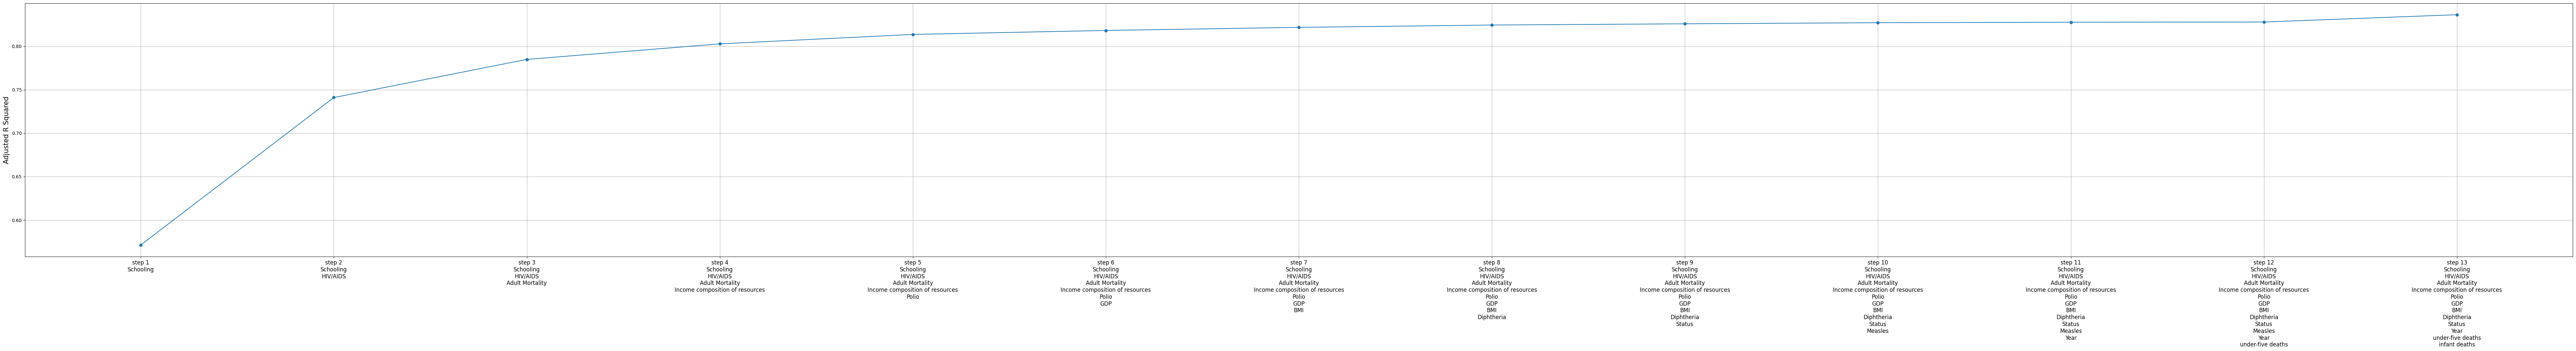

Best selected features: ['Schooling', 'HIV/AIDS', 'Adult Mortality', 'Income composition of resources', 'Polio', 'GDP', 'BMI', 'Diphtheria', 'Status', 'Year', 'under-five deaths', 'infant deaths']


In [16]:
def stepwise_feature_selection(X_train, y_train, variables=X_train.columns.tolist() ):
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings("ignore")
    
    y = y_train ## 반응 변수

    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.05
    sl_remove = 0.05
    
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
        ## 선형 모형을 적합한다.
        for col in remainder: 
            X = X_train[selected_variables+[col]]
            X = sm.add_constant(X)
            model = sm.OLS(y,X).fit(disp=0)
            pval[col] = model.pvalues[col]
    
        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(selected_variables) > 0:
                selected_X = X_train[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break
            
            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit(disp=0).rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break

    fig = plt.figure(figsize=(100,10))
    fig.set_facecolor('white')
    
    font_size = 15
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
    plt.plot(steps,adjusted_r_squared, marker='o')
      
    plt.ylabel('Adjusted R Squared',fontsize=font_size)
    plt.grid(True)
    plt.show()

    return selected_variables


selected_variables = stepwise_feature_selection(X_train, y_train)
print("Best selected features:", selected_variables)

In [17]:
X = data.drop('Life expectancy', axis=1)
X = X.drop('Year', axis=1)
X = X.drop('Status', axis=1)
X = X.drop('infant deaths', axis=1)
X = X.drop('Alcohol', axis=1)
X = X.drop('percentage expenditure', axis=1)
X = X.drop('Measles', axis=1)
X = X.drop('under-five deaths', axis=1)
X = X.drop('BMI', axis=1)
X = X.drop('Total expenditure', axis=1)
X = X.drop('Diphtheria', axis=1)
X = X.drop('GDP', axis=1)
X = X.drop('Population', axis=1)
X = X.drop('thinness 10-19 years', axis=1)
X = X.drop('thinness 5-9 years', axis=1)
# 상위 변수 5개 남기고 제거

In [18]:
from statsmodels.stats import outliers_influence

# 변수 5개 
vif = pd.DataFrame()
vif["VIF Factor"] = [outliers_influence.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,3.111611,Adult Mortality
1,14.253227,Polio
2,1.557548,HIV/AIDS
3,29.505411,Income composition of resources
4,37.141088,Schooling


In [19]:
X = X.drop('Polio', axis=1)

In [20]:
# 변수 4개 
vif = pd.DataFrame()
vif["VIF Factor"] = [outliers_influence.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,2.849349,Adult Mortality
1,1.549223,HIV/AIDS
2,28.832956,Income composition of resources
3,30.973729,Schooling


In [21]:
X = X.drop('Income composition of resources', axis=1)

In [22]:
# 변수 3개
vif = pd.DataFrame()
vif["VIF Factor"] = [outliers_influence.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,2.834316,Adult Mortality
1,1.545245,HIV/AIDS
2,2.075177,Schooling
